In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### 1. Data Preparation

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1], [0.1,1.2]])
mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1], [0.1,1.3]])

dist1 = np.random.multivariate_normal(mean_01, cov_01, 300)
dist2 = np.random.multivariate_normal(mean_02, cov_02, 300)
dist1.shape, dist2.shape

((300, 2), (300, 2))

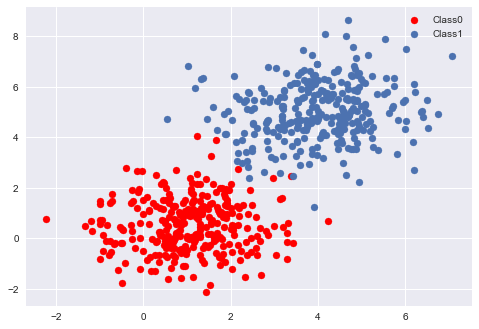

In [3]:
plt.scatter(dist1[:,0], dist1[:,1], color='red', label='Class0')
plt.scatter(dist2[:,0], dist2[:,1], label='Class1')
plt.legend()
plt.show()

In [4]:
data = np.zeros((600,3))
data[:300,:2] = dist1
data[300:,:2] = dist2
data[300:,-1] = 1
data.shape

(600, 3)

In [5]:
np.random.shuffle(data)
data[:10]

array([[5.80697408, 3.34080129, 1.        ],
       [3.75604746, 6.13273856, 1.        ],
       [0.56642343, 1.52885623, 0.        ],
       [4.5908546 , 4.31660891, 1.        ],
       [1.26778958, 1.0249763 , 0.        ],
       [0.35393406, 0.2305482 , 0.        ],
       [3.34248171, 4.5514592 , 1.        ],
       [1.75139657, 2.00581791, 0.        ],
       [1.17149631, 1.52201579, 0.        ],
       [4.63627381, 7.99841285, 1.        ]])

In [6]:
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((480, 2), (480,), (120, 2), (120,))

### 2. Normalize

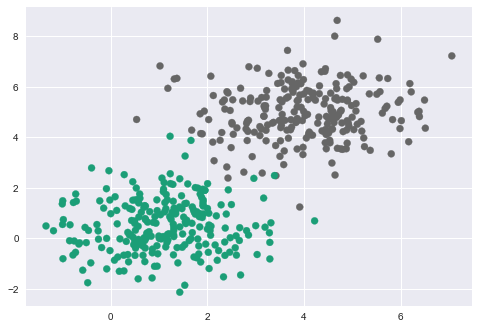

In [7]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Dark2)
plt.show()

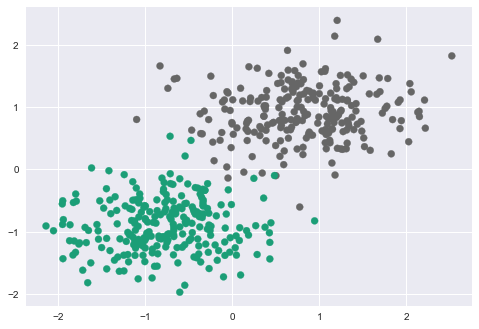

In [8]:
u = X_train.mean(axis=0)
s = X_train.std(axis=0)
X_train = (X_train-u)/s
X_test = (X_test-u)/s

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Dark2)
plt.show()

### 3. Logistic Regression

In [9]:
# X - entire array (m,n+1)
# y - array (m,1)
# theta - np.array(n+1,1)

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return e
    
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m
    
def gradDescent(X,y,lr=0.5, max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itr):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
    return theta, error_list

In [10]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
Y_train = Y_train.reshape((-1,1))
X_new_train.shape, Y_train.shape

((480, 3), (480, 1))

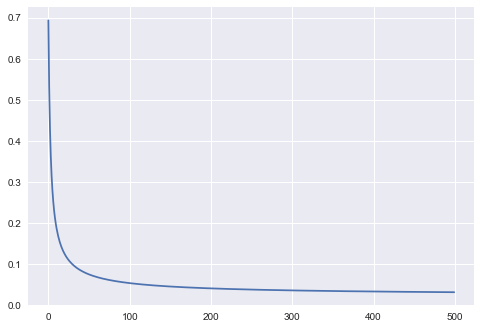

array([[0.0898304 ],
       [3.03498171],
       [4.66322822]])

In [11]:
theta, error_list = gradDescent(X_new_train, Y_train)
plt.plot(error_list)
plt.show()
theta

### 4. Decision Surface Visualisation

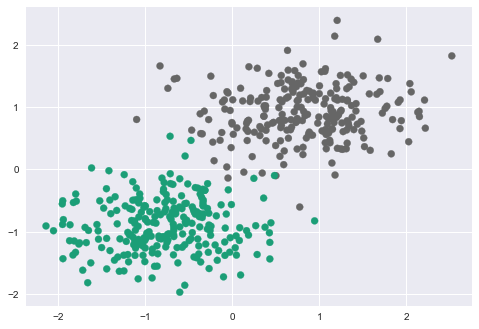

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train.reshape((-1,)), cmap=plt.cm.Dark2)
plt.show()

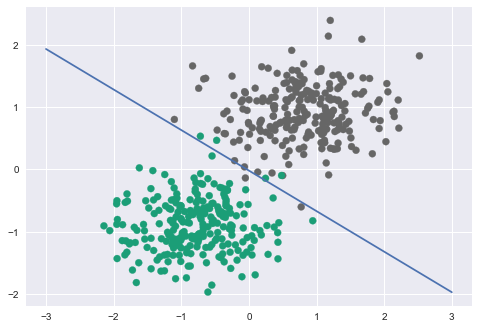

In [13]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train.reshape((-1,)), cmap=plt.cm.Dark2)
plt.plot(x1,x2)
plt.show()

### 5. Prediction & Accuracy

In [14]:
X_new_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
X_new_test[:5,:]

array([[ 1.        , -0.84334804, -1.29733961],
       [ 1.        ,  0.78243918,  1.51265848],
       [ 1.        , -0.92931961, -0.72979928],
       [ 1.        , -0.20335151, -0.58722534],
       [ 1.        ,  1.28288354,  1.66427974]])

In [15]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output = output.astype('int')
    output[h>=0.5] = 1
    return output
XT_preds = predict(X_new_train,theta)
Xt_preds = predict(X_new_test,theta)

In [16]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    
    acc = np.sum(actual==preds)/actual.shape[0]
    return acc*100

In [17]:
train_acc = accuracy(Y_train, XT_preds)
test_acc = accuracy(Y_test, Xt_preds)
train_acc, test_acc

(98.75, 100.0)

### 6. SkLearn

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\users\aditya\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [20]:
theta_0 = model.intercept_
theta_s = model.coef_
theta_0, theta_s

(array([0.0664327]), array([[2.51922994, 3.94550077]]))

In [21]:
model.score(X_train,Y_train)

0.9875

In [22]:
model.score(X_test,Y_test)

1.0